# Experiment 3

In [1]:
import argparse
from collections import Counter
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from population.population import Population
from population.utils.population_util.evaluate import evaluate_generations as eval_gen
from utils.dictionary import *

In [3]:
populations = [D_NEAT_GRU, D_NEAT_SRU]
folder='experiment3'
gen=1000
max_v=30

In [5]:
# Fetch all the complexities
print(f"\n===> COMPUTING POPULATION'S ELITE COMPLEXITY <===")
path = f"population_backup/storage/{folder}/"
genes_dict = dict()
for pop in populations:
    path_eval = f"{path}{pop}/evaluation"
    complexity = Counter()
    genes = Counter()
    genes_detailed = dict()
    for v in range(1, max_v + 1):
        population = Population(
                name=f'{pop}/v{v}',
                folder_name=folder,
                use_backup=True,
        )
        if population.generation == 0: raise Exception(f"Population {pop}/v{v} loaded incorrectly")
        if population.generation != gen: population.load(gen=gen)
        s = population.best_genome.size()
        complexity[str(s)] += 1
        c = str(s[0] + s[1])
        genes[c] += 1
        if c in genes_detailed:
            genes_detailed[c].append(v)
        else:
            genes_detailed[c] = [v]

    # Update global dictionary
    keys = list(genes.keys())
    for k in keys:
        genes[int(k)] = genes[k]
        del genes[k]
    genes_dict[pop] = list(sorted(genes.items()))


===> COMPUTING POPULATION'S ELITE COMPLEXITY <===

Population 'NEAT-GRU/v1' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v2' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v3' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v4' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v5' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v6' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v7' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v8' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v9' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v10' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v11' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v12' loaded successfully! Current generation: 1000

Population 'NEAT-GRU/v13' loaded successfully! Current generation: 1000

Populati

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


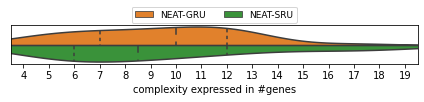

In [40]:
# Create the plot
max_x = 0
min_x = float('inf')
df = pd.DataFrame()
palette = []
for idx, pop in enumerate(populations):
    values = []
    for a, b in genes_dict[pop]:
        for _ in range(b):
            values.append(a)

    # Remove outliers
    values = sorted(values)
    q1 = min(values[int(round(1 / 4 * len(values)))], values[int(round(3 / 4 * len(values)))])
    q3 = max(values[int(round(1 / 4 * len(values)))], values[int(round(3 / 4 * len(values)))])
    iqr = q3 - q1

    for i in range(len(values) - 1, -1, -1):
        if (values[i] < (q1 - 1.5 * iqr)) or (values[i] > (q3 + 1.5 * iqr)): del values[i]
    if min(values) < min_x: min_x = min(values)
    if max(values) > max_x: max_x = max(values)
    df = df.append(pd.DataFrame({'complexity': values, 'y': 'ignore', 'pop': pop}))
    palette.append(COLORS[pop])

# Create the plot
plt.figure(figsize=(6, 2.2))
sns.violinplot(data=df,
               x="complexity", y="y", hue="pop",
               palette=palette, split=True,
               inner="quartile")
plt.xlim(min_x - .5, max_x + .5)
plt.xticks([i for i in range(min_x, max_x + 1)])
plt.xlabel("complexity expressed in #genes")
plt.yticks([])
plt.ylabel('')
leg = plt.legend(loc='upper center',
                 bbox_to_anchor=(0.5, 1.6),
                 fancybox=True,
                 fontsize=9,
                 ncol=len(populations))
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.tight_layout()
plt.savefig(f"delete_me/complexity_violin.png",
            bbox_inches='tight',
            pad_inches=0.02)
plt.savefig(f"delete_me/complexity_violin.eps",
            format='eps',
            bbox_inches='tight',
            pad_inches=0.02)
plt.show()
plt.close()